# Gradient Boosting Algorithm

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target
print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop("PRICE", axis = 1), boston_df['PRICE'], random_state = 1, test_size = 0.25)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36


In [7]:
X_train.shape

(379, 13)

**Check for missing values in the dataset**

In [8]:
boston_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

## Modeling

### Ensemble from Scratch


1. Fit a Model
2. Compute errors/residuals
3. Fit another model on the errors
4. Combine Models

In [9]:
# 1st Decision Tree fitting
DT_1 = DecisionTreeRegressor(max_depth=2)
DT_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [10]:
resid_1 = y_train - DT_1.predict(X_train)

In [11]:
# 2nd Decission Tree fitting on residuals(Y -axis) 
DT_2 = DecisionTreeRegressor(max_depth=2)
DT_2.fit(X_train, resid_1)

DecisionTreeRegressor(max_depth=2)

In [12]:
resid_2 = resid_1 - DT_2.predict(X_train)

In [13]:
# 3rd Decision Tree on residuals of 2nd Tree fitting.
DT_3 = DecisionTreeRegressor(max_depth=2)
DT_3.fit(X_train, resid_2)

DecisionTreeRegressor(max_depth=2)

In [14]:
resid_3 = resid_2 - DT_3.predict(X_train)

#### Ensemble: Combine all tree tree predictions into one

In [15]:
y_pred = sum(model.predict(X_train) for model in [DT_1, DT_2, DT_3])

In [16]:
predictions = pd.DataFrame(DT_1.predict(X_train), columns=['Model_1'])
predictions['Model_2'] = pd.DataFrame(DT_2.predict(X_train))
predictions['Model_3'] = pd.DataFrame(DT_3.predict(X_train))
predictions['Ensemble'] = pd.DataFrame(y_pred)
predictions['Actual'] = pd.DataFrame(y_train).reset_index()['PRICE']

predictions.head()

,Model_1,Model_2,Model_3,Ensemble,Actual
0,27.374815,-0.78482,-0.991752,25.598243,20.6
1,19.227673,-0.78482,3.008682,21.451535,23.1
2,27.374815,-0.78482,-0.991752,25.598243,28.0
3,19.227673,-0.78482,3.008682,21.451535,20.0
4,19.227673,-0.78482,3.008682,21.451535,23.1


#### Examine average Error

In [17]:
error = []
for n_estimator in range(10):
    clf = xgb.XGBRegressor(max_depth = 2, n_estimators = n_estimator+1)
    clf.fit(X_train, y_train)
    error.append(
    {
      'Tree Count' : n_estimator+1,
      'Average Error' : np.average(y_train - clf.predict(X_train))
    })
error_df = pd.DataFrame(error).set_index('Tree Count')
error_df

,Average Error
Tree Count,
1,15.365917
2,10.820311
3,7.601979
4,5.356514
5,3.780887
6,2.669656
7,1.876602
8,1.326235
9,0.941005


### Using sk-learn Package

Using sklearn Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, n_estimators = 3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=3)

In [19]:
pd.DataFrame(gbr.predict(X_train),columns=['y_train']).head(10)

,y_train
0,23.302469
1,21.940926
2,23.302469
3,21.940926
4,21.940926
5,23.302469
6,20.074593
7,23.302469
8,24.524765
9,20.074593


### XGBoosting Algorithm

#### XGBoosting Parameters: 

**Important Parameters for Overfitting:**
- **learning_rate**:  Controls the contribution of each tree in the ensemble (optimal values between 0.01-0.2). ESL states that the best strategy might be to set learning_rate low (<0.1) and then choose n_estimators by early stopping.
- **max_depth**: Controls the depth of the tree. More depth = more complexity, more variance, and slower computation speed. (Optimal values between 4-8)
- **min_child_weight**: (default is 1)
- **gamma**: it's an additional regularization parameter (similar to learning_rate)

**Import Parameters for Speed/Computation:**
- **colsample_bytree**: subsample ratio of column (features) - Randomness; better generalizability
- **subsample**: subsample ratio of training instances (observations) - Randomness; better generalizability
- **n_estimators**: number of boosting trees

#### Learning Curve
***
A learning curve is used to evaluate your train and validation scores to check for signs of **overfitting**. This can also be used alongside **early stopping.**

**Rule of Thumb:**

When tuning these other parameters, you may want to **first study the effects of each parameter** on the learning curves.

By examining the **learning curve** you can start to see the effects of each parameter and hopefully apply a **grid search** to find optimal model parameters. 

**Define eval_set**

In [20]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [21]:
results = []
for max_depth in [2,3,4,5,10,12,15]:
    xgbr = xgb.XGBRegressor(max_depth=max_depth)
    xgbr.fit(X_train, y_train, eval_set = eval_set, verbose = False)
    results.append(
    {
     'max_depth' : max_depth,
     'train_error' : metrics.mean_squared_error(y_train, xgbr.predict(X_train)),
     'test_error' : metrics.mean_squared_error(y_test, xgbr.predict(X_test))
    })
    
max_depth_lr = pd.DataFrame(results).set_index('max_depth')
max_depth_lr

,train_error,test_error
max_depth,,
2,1.959048e+00,7.935388
3,3.809437e-01,8.012053
4,5.225089e-02,7.604294
5,4.668859e-03,8.340296
10,7.346177e-07,9.089097
12,5.301830e-07,9.062613
15,4.015946e-07,8.995212


Best maximun depth = 4 

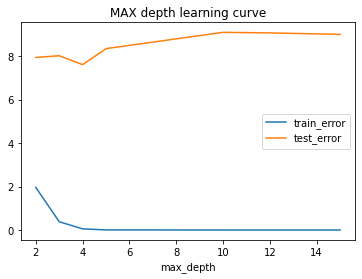

In [22]:
max_depth_lr.plot(title='MAX depth learning curve')

In [23]:
results = []
for learning_rate in [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    xgbr = xgb.XGBRegressor(learning_rate = learning_rate, max_depth = 2, n_estimators = 200)
    xgbr.fit(X_train, y_train, eval_set = eval_set, verbose = False)
    results.append(
    {
     'Learning Rate' : learning_rate,
     'train_error' : metrics.mean_squared_error(y_train, xgbr.predict(X_train)),
     'test_error' : metrics.mean_squared_error(y_test, xgbr.predict(X_test))
    })
    
learning_rate_lr = pd.DataFrame(results).set_index('Learning Rate')
learning_rate_lr

,train_error,test_error
Learning Rate,,
0.05,4.583827,8.817560
0.10,2.705525,8.965417
0.20,1.282708,8.484289
0.40,0.391692,9.345732
0.60,0.174038,11.138466
0.80,0.062137,16.512530
1.00,0.048212,15.692359


Best Learning Rate : 0.2

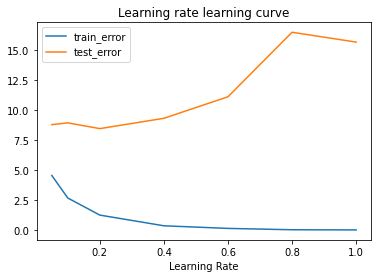

In [24]:
learning_rate_lr.plot(title = 'Learning rate learning curve')

In [25]:
results = []
for n_estimators in [50, 60, 100, 150, 200, 500, 750, 1000]:
    xgbr = xgb.XGBRegressor(max_depth = 2, learning_rate = 0.1, n_estimators = n_estimators)
    xgbr.fit(X_train, y_train, verbose = False, eval_set = eval_set)
    results.append(
    {
        'n_estimators' : n_estimators,
        'Train_error' : metrics.mean_squared_error(y_train, xgbr.predict(X_train)),
        'Test_error' : metrics.mean_squared_error(y_test, xgbr.predict(X_test))
    })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators')
n_estimators_lr

,Train_error,Test_error
n_estimators,,
50,7.319554,10.491700
60,6.419937,9.862828
100,4.597940,9.051510
150,3.418487,8.887978
200,2.705525,8.965417
500,1.004344,9.242724
750,0.531059,9.393357
1000,0.301423,9.657641


Best N_estimator = 150

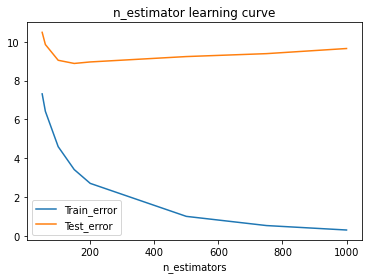

In [26]:
n_estimators_lr.plot(title='n_estimator learning curve')

### Perform GridSearchCV

In [27]:
model = xgb.XGBRegressor()
param_grid ={
    'max_depth' : [2,3,5,8,10],
    'max_features' : [1.0, 0.3, 0.1],
    'min_sample_leaf' : [3, 5, 9],
    'n_estimators' : [50, 60, 100, 150 ,300],
    'learning_rate' : [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
}

In [28]:
gs_cv = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1).fit(X_train, y_train)

[20:57:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [29]:
gs_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 1.0,
 'min_sample_leaf': 3,
 'n_estimators': 150}

In [38]:
gs_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=1.0,
             min_child_weight=1, min_sample_leaf=3, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
gs_cv.best_score_

0.8437075496932317

[21:13:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_features, min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




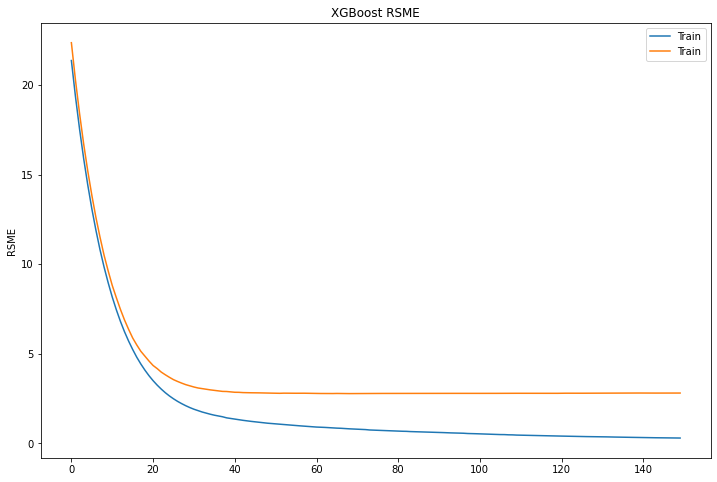

In [63]:
best_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5, max_features=1.0,
             min_child_weight=1, min_sample_leaf=3,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
best_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred = best_model.predict(X_test)
predictions = np.round(y_pred,1)

results = best_model.evals_result()

epochs = len(results['validation_0']['rmse'])

plt.figure(figsize=(12,8))
plt.plot(range(epochs), results['validation_0']['rmse'], label='Train')
plt.plot(range(epochs), results['validation_1']['rmse'], label='Train')
plt.legend()
plt.ylabel('RSME')
plt.title('XGBoost RSME')
plt.show()

### Feature Importance

<Figure size 864x576 with 0 Axes>

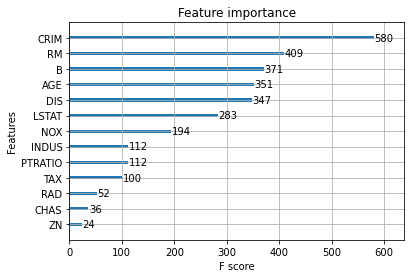

In [66]:
plt.figure(figsize=(12,8))
xgb.plot_importance(best_model)
plt.show()